In [10]:
import pandas as pd
from glob import glob
import numpy as np
import io
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# save as CSV files from url 
start_date = datetime.datetime(2020, 1, 21)
today = datetime.datetime.today()

total_days_str = today - start_date
total_days = int(total_days_str.days)

date_list = list()
for i in range(total_days):
    start_date += datetime.timedelta(days=1)
    date_list.append(start_date.strftime("%m-%d-%Y"))

base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
for date in range(len(date_list)):
    modified_url = base_url + str(date_list[date]) + '.csv'
    read_data = requests.get(modified_url).content
    pd.read_csv(io.StringIO(read_data.decode('utf-8'))).to_csv(f'COVID_data/{date_list[date]}.csv', index=False)

In [4]:
def get_daily_data_for_each_country(country, df, date_validator, first_case_found):
    try:
        confirmed_cases = df[df['Country/Region'] == country]['Confirmed']
        death_cases = df[df['Country/Region'] == country]['Deaths']
        recovered_cases = df[df['Country/Region'] == country]['Recovered']
        if len(confirmed_cases) > 0:
            print(f'Total number of confirmed cases in Country/Region, {country} on {date_validator} was, ', df[df['Country/Region'] == country]['Confirmed'].values)
            confirmed_cases_count = df[df['Country/Region'] == country]['Confirmed'].values[0]
        if len(death_cases) > 0:
            print(f'Total number of deaths in Country/Region, {country} on {date_validator} was, ', df[df['Country/Region'] == country]['Deaths'].values)
            death_cases_count = df[df['Country/Region'] == country]['Deaths'].values[0]
        if len(recovered_cases) > 0:
            print(f'Total number of recoveries in Country/Region, {country} on {date_validator} was, ', df[df['Country/Region'] == country]['Recovered'].values)
            recovered_cases_count = df[df['Country/Region'] == country]['Recovered'].values[0]
        else:
            print(f'No cases were found in Country/Region {country} on {date_validator}')
            return 0, 0, 0, date_validator
    except:
        confirmed_cases = df[df['Country_Region'] == country]['Confirmed']
        death_cases = df[df['Country_Region'] == country]['Deaths']
        recovered_cases = df[df['Country_Region'] == country]['Recovered']
        if len(confirmed_cases) > 0:
            print(f'Total number of confirmed cases in Country_Region, {country} on {date_validator} was, ', df[df['Country_Region'] == country]['Confirmed'].values)
            confirmed_cases_count = df[df['Country_Region'] == country]['Confirmed'].values[0]
        if len(death_cases) > 0:
            print(f'Total number of deaths in Country_Region, {country} on {date_validator} was, ', df[df['Country_Region'] == country]['Deaths'].values)
            death_cases_count = df[df['Country_Region'] == country]['Deaths'].values[0]
        if len(recovered_cases) > 0:
            print(f'Total number of recoveries in Country_Region, {country} on {date_validator} was, ', df[df['Country_Region'] == country]['Recovered'].values)
            recovered_cases_count = df[df['Country_Region'] == country]['Recovered'].values[0]
        else:
            print(f'No cases were found in Country_Region {country} on {date_validator}')
            return 0, 0, 0, date_validator

In [11]:
data_frames[2].fillna(0, axis=1, inplace=True)
get_daily_data_for_each_country('Mainland China', data_frames[2], date_validator[2], first_case_found)
data_frames[2].info()

No cases were found in Country_Region Mainland China on 01-24-2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2882 non-null   float64
 1   Admin2          2882 non-null   object 
 2   Province_State  2882 non-null   object 
 3   Country_Region  2882 non-null   object 
 4   Last_Update     2882 non-null   object 
 5   Lat             2882 non-null   float64
 6   Long_           2882 non-null   float64
 7   Confirmed       2882 non-null   int64  
 8   Deaths          2882 non-null   int64  
 9   Recovered       2882 non-null   int64  
 10  Active          2882 non-null   int64  
 11  Combined_Key    2882 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 270.3+ KB


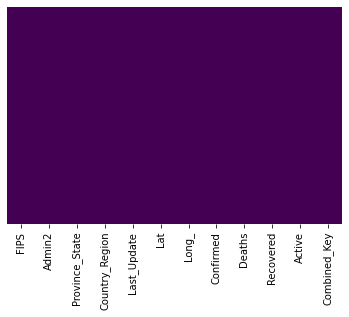

In [12]:
sns.heatmap(data_frames[2].isnull(),yticklabels=False,cbar=False,cmap='viridis')

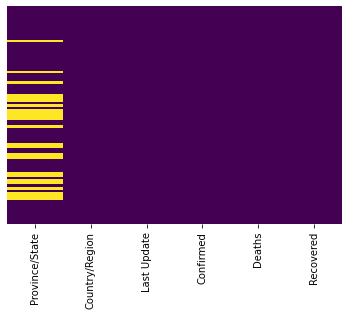

In [13]:
sns.heatmap(data_frames[98].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
# df.fillna(0, axis=1, inplace=True)

In [82]:
# get_daily_data_for_each_country('Mainland China', df, '01-23-2020', first_case_found)

In [6]:
first_case_found = False
previous_confirmed_count = 0
previous_death_count = 0
previous_recovered_count = 0
date_validator = date_list


for date in range(len(date_list)):
    
    country = 'Mainland China'
    file_names = glob('COVID_data/*.csv')
    
    data_frames = [pd.read_csv(df) for df in file_names]

    for i in range(len(data_frames)):
        data_frames[i].fillna(0, axis=1, inplace=True)
        total_confirmed, total_deaths, total_recovered, date_of_first_case = get_daily_data_for_each_country(country, data_frames[i], date_validator[i], first_case_found)
        increment_in_confirmed = total_confirmed - previous_confirmed_count
        increment_in_deaths = total_deaths - previous_death_count
        delta_recovered = total_recovered - previous_recovered_count

        print(f'increment_in_confirmed is {increment_in_confirmed}')
        print(f'increment_in_deaths is {increment_in_deaths}')
        print(f'delta_recovered is {delta_recovered}')
    
    previous_confirmed_count = total_confirmed
    previous_death_count = total_deaths
    previous_recovered_count = total_recovered


Total number of confirmed cases in Country/Region, Mainland China on 01-22-2020 was,  [65187  1347  1271  1205  1016   989   934   756   631   576   531   480
   400   337   312   294   252   245   174   168   146   135   133   121
    93    91    76    75    71    18     1]
Total number of deaths in Country/Region, Mainland China on 01-22-2020 was,  [2615    7   19    1    4    6    1    6    0    6    3   12    4    3
    6    1    2    1    2    5    2    3    0    1    1    2    2    0
    0    0    0]
Total number of recoveries in Country/Region, Mainland China on 01-22-2020 was,  [20969   851  1033   867   783   744   719   377   478   384   307   249
   235   272   261   218   147   192   144   129   104    96   104    88
    65    81    34    38    65    18     1]


TypeError: cannot unpack non-iterable NoneType object

In [76]:
for day in range(days_since_first_data):
#     if len(str(date_iterator.month)) > 1:
#         date_iterator_month = str(date_iterator.month)
#     else:
#         date_iterator_month = '0' + str(date_iterator.month)

#     if len(str(date_iterator.day)) > 1:
#         date_iterator_day = str(date_iterator.day)
#     else:
#         date_iterator_day = '0' + str(date_iterator.day)
    date_iterator_month = str(date_iterator.month) if len(str(date_iterator.month)) > 1 else '0' + str(date_iterator.month)
    print(date_iterator_month)
    date_iterator_day = str(date_iterator.day) if len(str(date_iterator.day)) > 1 else '0' + str(date_iterator.day)
    print(date_iterator_day)
    date_iterator_year = str(date_iterator.year)
    print(date_iterator_year)


#     date_validator = date_iterator_month + '-' + date_iterator_day + '-' + date_iterator_year
#     file_validator = date_validator + '.csv'

#     covid_data = pd.read_csv('COVID_data/' + file_validator)

#     covid_data.fillna(0, axis=1, inplace=True)
#     country ='Mainland China'
#     total_confirmed, total_deaths, total_recovered, date_of_first_case = get_daily_data_for_each_country(country, df, date_validator, first_case_found)